In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/advertising.csv")

In [ ]:
df.shape

(200, 4)

In [ ]:
df.isnull()
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
195,False
196,False
197,False
198,False


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

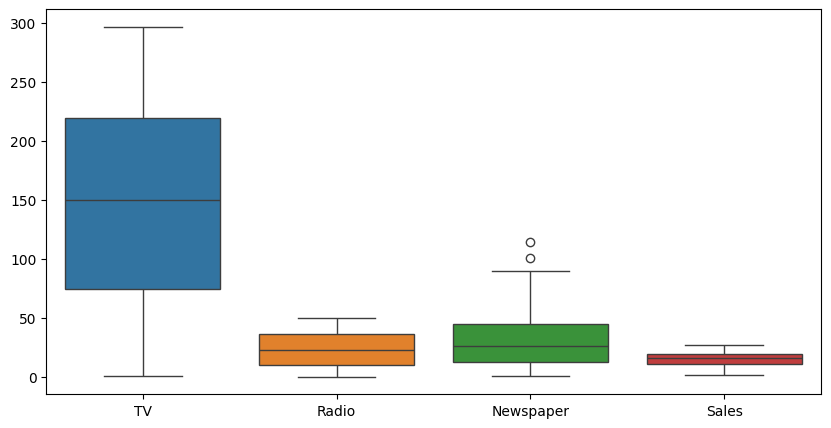

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
sns.boxplot(data=df, ax=ax)

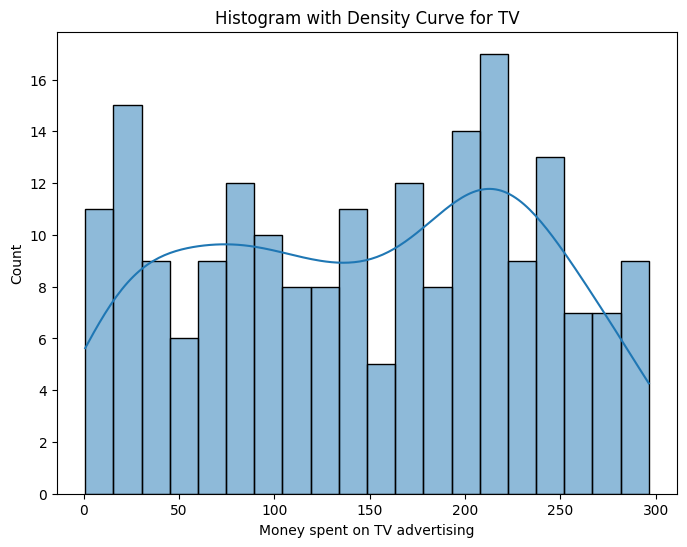

In [ ]:
fig,ax=plt.subplots(figsize=(8,6))
sns.histplot(df['TV'],bins=20, kde=True)
ax.set_xlabel('Money spent on TV advertising')
ax.set_title('Histogram with Density Curve for TV')
plt.show()

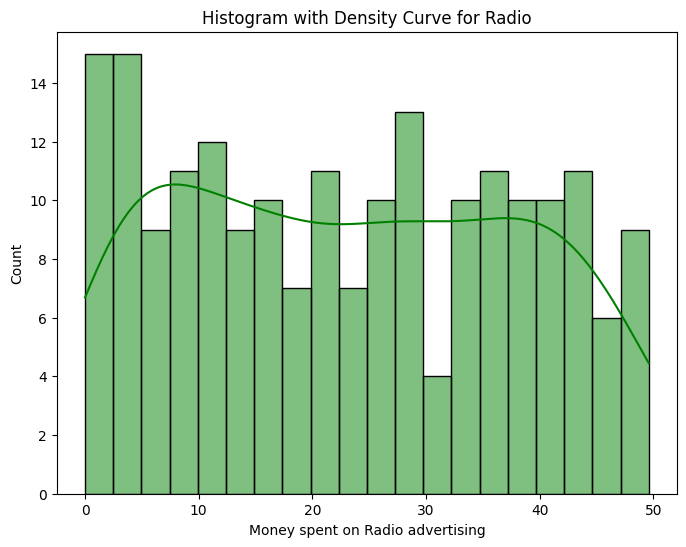

In [ ]:
fig,ax=plt.subplots(figsize=(8,6))
sns.histplot(df['Radio'],bins=20,color='green', kde=True)
ax.set_xlabel('Money spent on Radio advertising')
ax.set_title('Histogram with Density Curve for Radio')
plt.show()

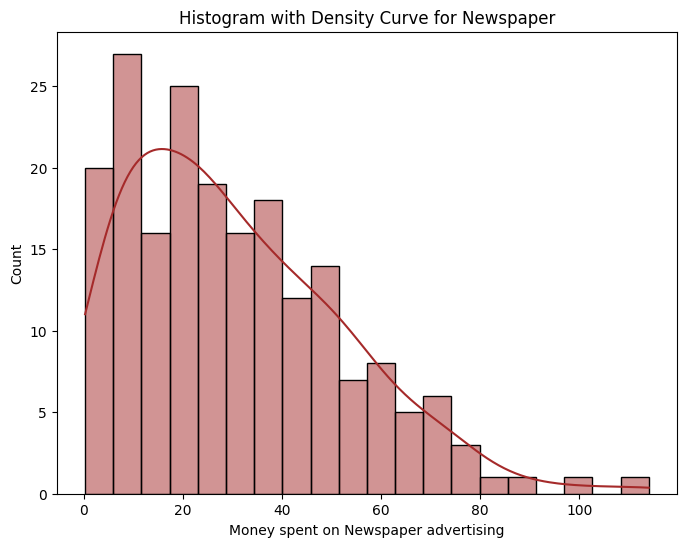

In [ ]:
fig,ax=plt.subplots(figsize=(8,6))
sns.histplot(df['Newspaper'],bins=20,color='brown', kde=True)
ax.set_xlabel('Money spent on Newspaper advertising')
ax.set_title('Histogram with Density Curve for Newspaper')
plt.show()

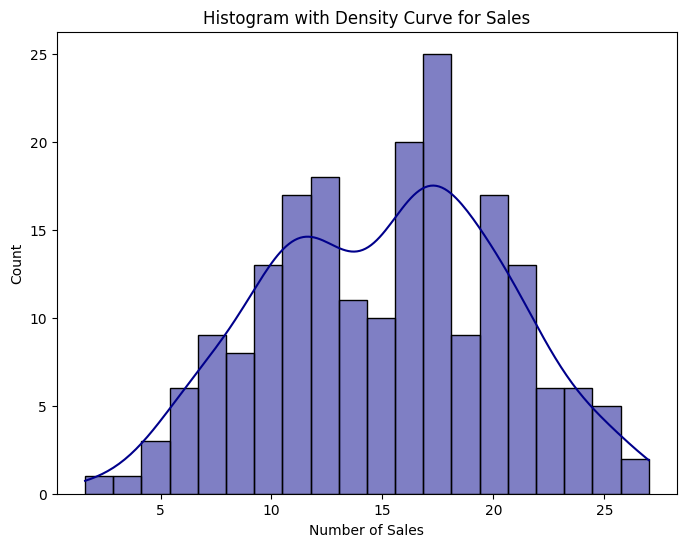

In [ ]:
fig,ax=plt.subplots(figsize=(8,6))
sns.histplot(df['Sales'],bins=20,color='darkblue', kde=True)
ax.set_xlabel('Number of Sales')
ax.set_title('Histogram with Density Curve for Sales')
plt.show()

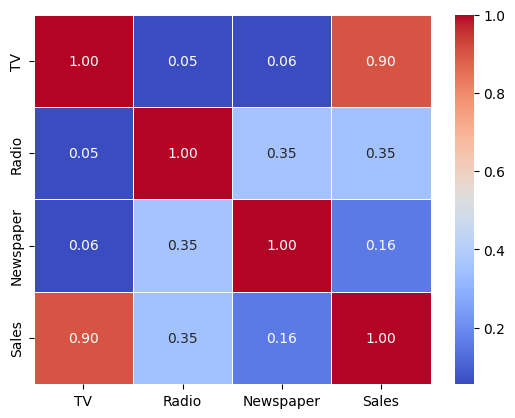

In [ ]:
fig,ax=plt.subplots()
sns.heatmap(df.corr(), annot=True,cmap='coolwarm',fmt=".2f",ax=ax,linewidth=0.5)
plt.show()

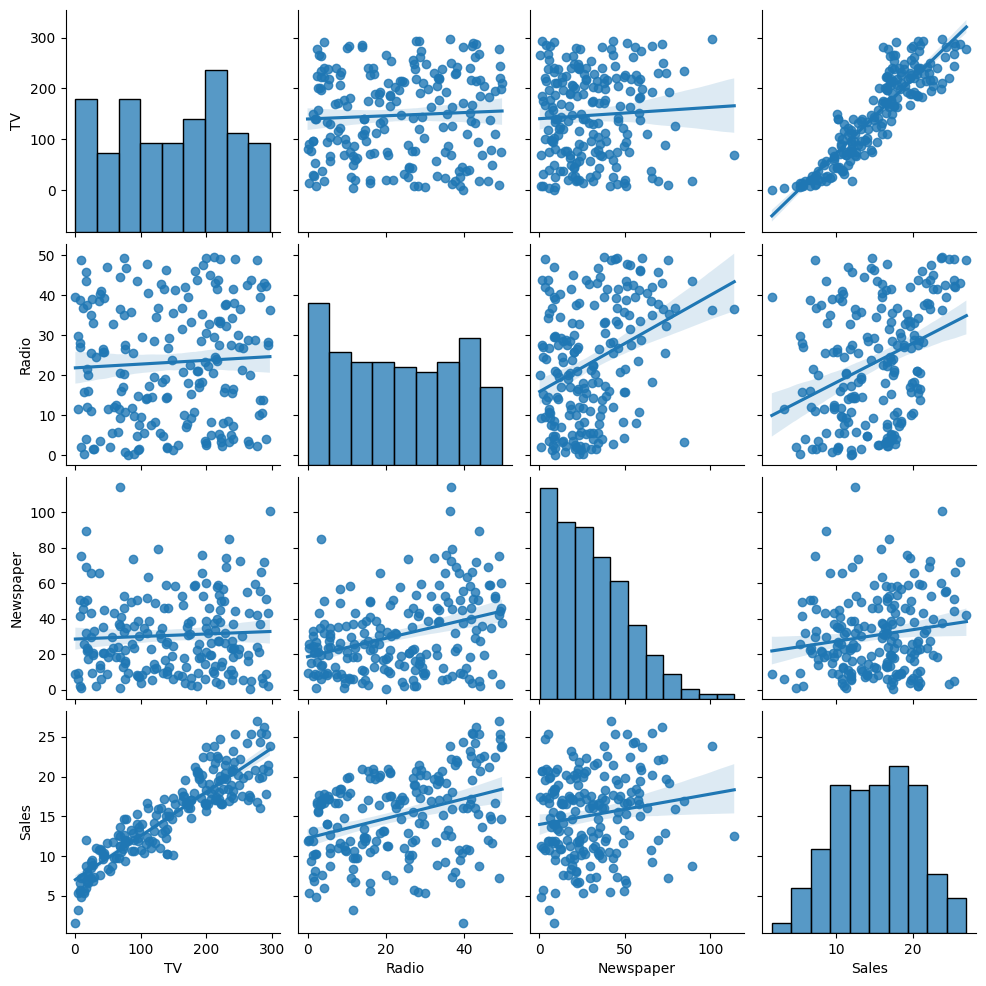

In [ ]:
sns.pairplot(df, kind='reg')

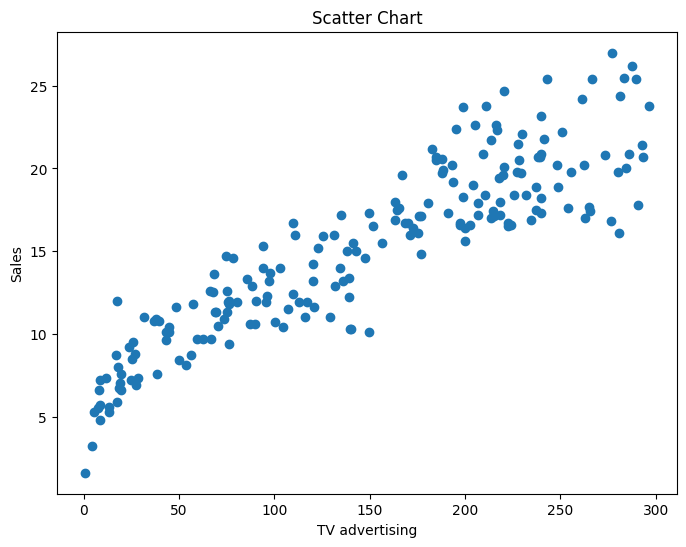

In [ ]:
fig,ax=plt.subplots(figsize=(8,6))
ax.scatter(x='TV',y='Sales',data=df,marker='o')
ax.set_xlabel('TV advertising')
ax.set_ylabel('Sales')
ax.set_title("Scatter Chart")
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_vif = df.drop('Sales', axis=1)
df_vif = df_vif.apply(pd.to_numeric, errors= 'coerce')
vif_data= pd.DataFrame()
vif_data["Feature"] = df_vif.columns
vif_data["VIF"] =[variance_inflation_factor(df_vif.values, i) for i in range(len(df_vif.columns))]
print(vif_data)

     Feature       VIF
0         TV  2.486772
1      Radio  3.285462
2  Newspaper  3.055245


In [ ]:
from sklearn.model_selection import train_test_split
x= df[['TV', 'Radio','Newspaper']]
y=df['Sales']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)
train_data= x_train.join(y_train)
train_data

,TV,Radio,Newspaper,Sales
82,75.3,20.3,32.5,11.3
58,210.8,49.6,37.7,23.8
29,70.6,16.0,40.8,10.5
192,17.2,4.1,31.6,5.9
79,116.0,7.7,23.1,11.0
...,...,...,...,...
153,171.3,39.7,37.7,16.0
65,69.0,9.3,0.9,11.3
128,220.3,49.0,3.2,24.7
172,19.6,20.1,17.0,7.6


In [ ]:
from sklearn.linear_model import LinearRegression
x_train, y_train = train_data[['TV', 'Radio','Newspaper']], train_data['Sales']
fitted_model = LinearRegression()
fitted_model.fit(x_train,y_train)
y_pred = fitted_model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MSE =  mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
R2_Score = r2_score(y_test, y_pred)

print('Mean squared error value is: ', MSE)
print('Mean absolute error value is: ', MAE)
print('R2 score value is: ', R2_Score)

Mean squared error value is:  2.8687304981248993
Mean absolute error value is:  1.304419074125122
R2 score value is:  0.8983065871857489


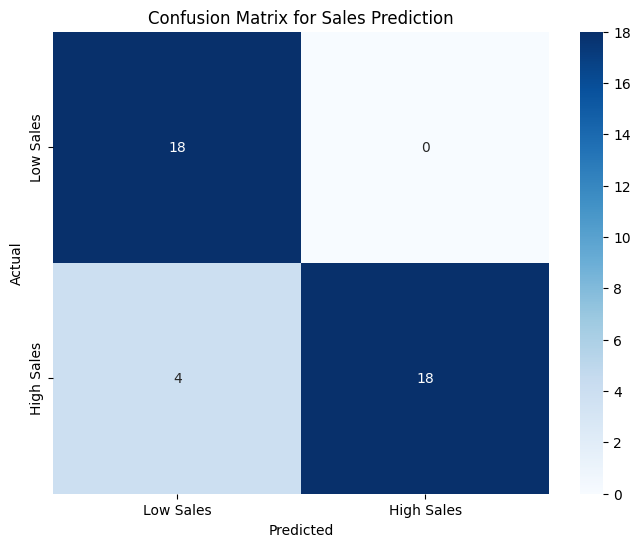

In [ ]:
from sklearn.metrics import confusion_matrix

threshold = np.mean(y_test)
y_pred_class = np.where(y_pred >= threshold, 1, 0)
y_test_class = np.where(y_test >= threshold, 1, 0)
cm = confusion_matrix(y_test_class, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Sales', 'High Sales'],
            yticklabels=['Low Sales', 'High Sales'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Sales Prediction')
plt.show()

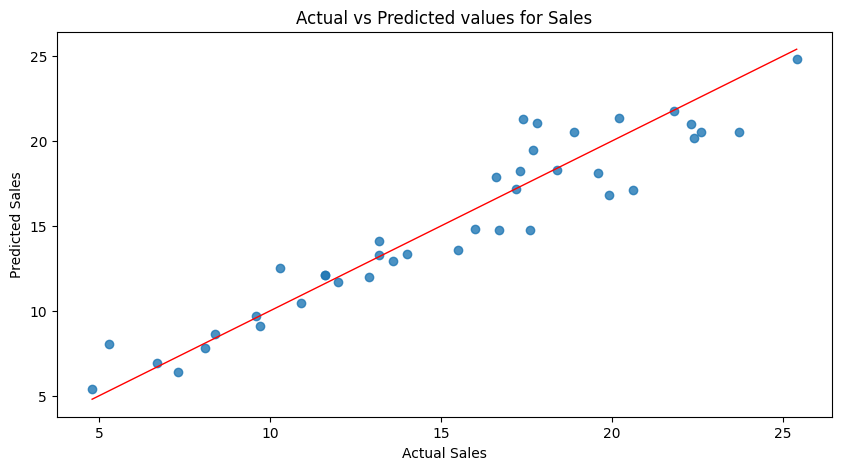

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred,alpha=0.8)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red',linewidth=1)
plt.title('Actual vs Predicted values for Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeRegressor
x_train, y_train = train_data[['TV', 'Radio','Newspaper']], train_data['Sales']
fitted_model_dt= DecisionTreeRegressor()
fitted_model_dt.fit(x_train,y_train)
y_pred = fitted_model_dt.predict

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = fitted_model_dt.predict(x_test)
MSE =  mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
R2_Score = r2_score(y_test, y_pred)
print('Mean squared error value is: ', MSE)
print('Mean absolute error value is: ', MAE)
print('R2 score value is: ', R2_Score)

Mean squared error value is:  1.6667499999999997
Mean absolute error value is:  0.9425000000000001
R2 score value is:  0.9409155039419205


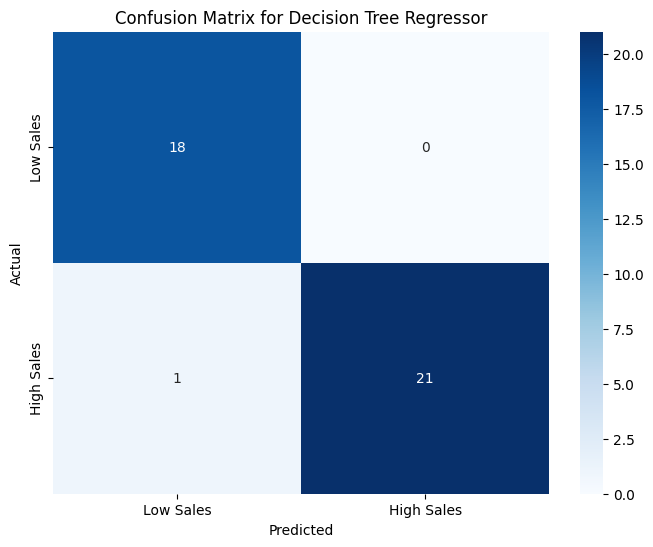

In [ ]:
from sklearn.metrics import confusion_matrix
threshold = np.mean(y_test)
y_pred_class = np.where(y_pred >= threshold, 1, 0)
y_test_class = np.where(y_test >= threshold, 1, 0)
cm = confusion_matrix(y_test_class, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Sales', 'High Sales'],
            yticklabels=['Low Sales', 'High Sales'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Regressor')
plt.show()

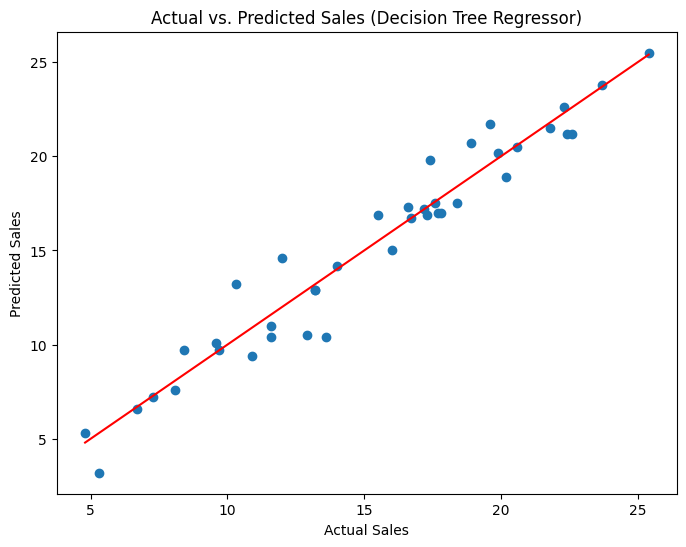

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales (Decision Tree Regressor)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

Mean Squared Error: 2.3574700000000015
Mean Absolute Error: 1.2225000000000001
R-squared: 0.9164302223356587


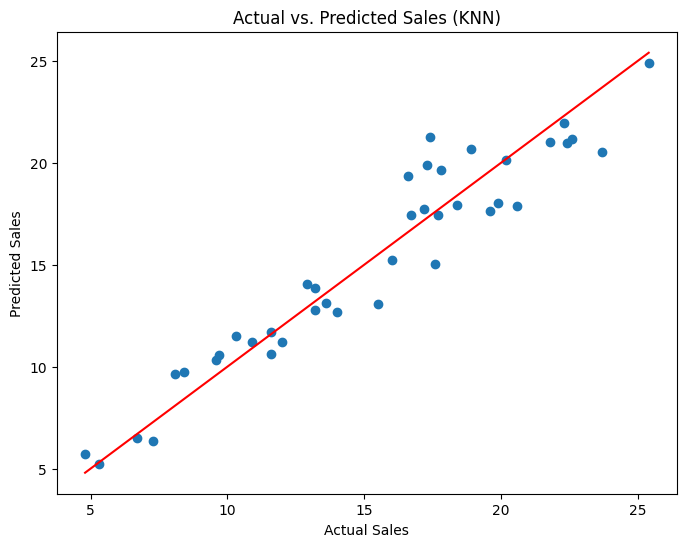

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales (KNN)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

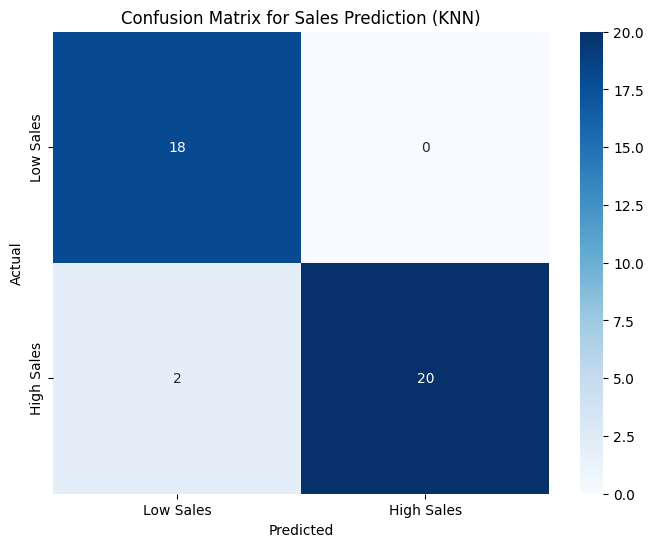

In [ ]:
threshold = np.mean(y_test)
y_pred_class = np.where(y_pred >= threshold, 1, 0)
y_test_class = np.where(y_test >= threshold, 1, 0)
cm_knn = confusion_matrix(y_test_class, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Sales', 'High Sales'],
            yticklabels=['Low Sales', 'High Sales'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Sales Prediction (KNN)')
plt.show()

               Model      MSE     MAE  R-squared
0  Linear Regression  1.66675  0.9425   0.940916
1                KNN  2.35747  1.2225   0.916430
2      Decision Tree  1.66675  0.9425   0.940916


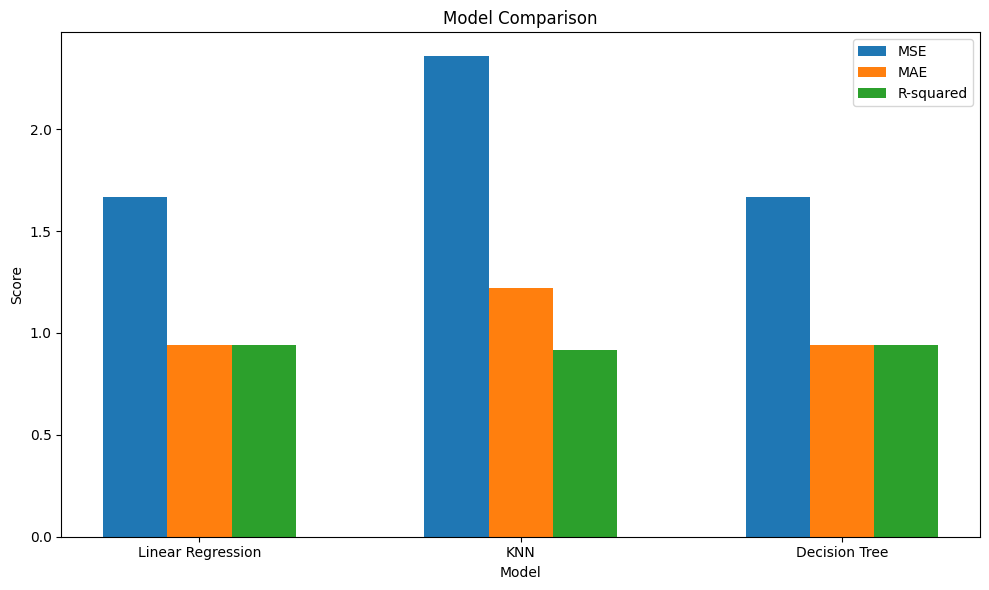

In [ ]:
model_names = ['Linear Regression', 'KNN', 'Decision Tree']

mse_scores = [MSE, mse, MSE]
mae_scores = [MAE, mae, MAE]
r2_scores = [R2_Score, r2, R2_Score]


results_df = pd.DataFrame({
    'Model': model_names,
    'MSE': mse_scores,
    'MAE': mae_scores,
    'R-squared': r2_scores
})

# Display the comparison table
print(results_df)

# Plotting the comparison
plt.figure(figsize=(10, 6))
bar_width = 0.2

index = np.arange(len(model_names))

plt.bar(index, mse_scores, bar_width, label='MSE')
plt.bar(index + bar_width, mae_scores, bar_width, label='MAE')
plt.bar(index + 2 * bar_width, r2_scores, bar_width, label='R-squared')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks(index + bar_width, model_names)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
x.tail(10)

,TV,Radio,Newspaper
190,39.5,41.1,5.8
191,75.5,10.8,6.0
192,17.2,4.1,31.6
193,166.8,42.0,3.6
194,149.7,35.6,6.0
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2
199,232.1,8.6,8.7


In [ ]:
y.tail(10)

,Sales
190,10.8
191,11.9
192,5.9
193,19.6
194,17.3
195,7.6
196,14.0
197,14.8
198,25.5
199,18.4


In [ ]:
data = {'TV': [100], 'Radio': [20] ,'Newspaper': [10]}
trial_data = pd.DataFrame(data)

In [ ]:
predict_rating = knn_model.predict(trial_data)
print('Predicted Rating for trial data: ',predict_rating[0])

Predicted Rating for trial data:  12.36
